In [1]:
%pip install yaml

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests,json, time
from pprint import pprint

# Get the API key and username from yaml

import yaml
with open("key.yaml", "r") as file:
    api_keys = yaml.safe_load(file)

api_key = api_keys["API_KEY"]
api_username = "ShubhamG"
defaultHost = "discourse.onlinedegree.iitm.ac.in"

# Headers for authentication
headers = {
    'Api-Key': api_key,
    'Api-Username': api_username
}

# CATEGORIES

## Retrieves a list of categories

In [2]:
endpoint = f'https://{defaultHost}/categories.json?include_subcategories=true'
# Make the request
response = requests.get(endpoint, 
                        headers=headers)

# Check the response
if response.status_code == 200:
    # data = response.json()
    print(response.status_code)
else:
    print(f'Error: {response.status_code}')

200


In [4]:
# Dump the response into a json file
import json
with open(f'IMP_JSONs/all_categories_subcategories.json', "w") as f:
    f.write(json.dumps(response.json(), indent=4))

In [8]:
list_of_categories = response.json()["category_list"]["categories"]
for category in list_of_categories:
    if category["name"]=="Courses":
        course_ids = category["subcategory_ids"]
        break
# Dump the course ids in a txt file
with open(f'IMP_JSONs/course_ids.txt', "w") as f:
    f.write(str(course_ids))

## List topics

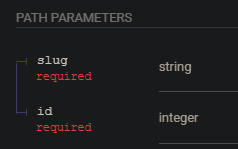

# Show category

In [9]:
slug, id="mlp-kb", 33
endpoint = f'https://{defaultHost}/c/{slug}/{id}.json'
# Make the request
response = requests.get(endpoint, 
                        headers=headers)

# Check the response
if response.status_code == 200:
    # data = response.json()
    print(response.status_code)
else:
    print(f'Error: {response.status_code}')


200


In [10]:
# Dump the response into a json file
import json
with open(f'IMP_JSONs/all_topics_mlp-kb.json', "w") as f:
    f.write(json.dumps(response.json(), indent=4))

### Comments:

In this JSON (dictionary), inside dict["topics"] we have the list of ALL topics each in JSON format, now for each topic, we can find its **original_poster ID** (from dict["topics"]["posters"]), and also the time at which it was **created_at**, and how many **like_count** were given. The **posts_count** means *original_post+no_of_replies* (which can also define engagement)

But what is the meaning of "reply_count" for each topic?

# Get a list of user actions

## User Action types:

In [5]:
# Keep the below code in a loop and increment the offset by 30 each time. The loop should break when the number of elements in the response is less than 30
offset = 0
data_dict ={"user_actions":[]}
while True:
    time.sleep(0.1)
    endpoint = f'https://{defaultHost}/user_actions.json?username=karthik_pod&offset={offset}'
    # Make the request
    response = requests.get(endpoint, 
                            headers=headers)

    # Check the response
    if response.status_code == 200:
        data = response.json()
        num_elements = len(data["user_actions"])
        data_dict["user_actions"].extend(data["user_actions"])
        offset+=30
        if offset%900==0:
            print(offset, len(data_dict["user_actions"]))
        if num_elements<30:
            break
    else:
        print(f'Error: {response.status_code}')
        break


900 900
1800 1800
2700 2700
3600 3600
4500 4500
5400 5400
6300 6300
7200 7200
8100 8100
9000 9000
9900 9900
10800 10800
11700 11700
12600 12600
13500 13500
14400 14400
15300 15300


In [7]:
data_list = data_dict["user_actions"]
len(data_list)

15699

In [14]:
action_to_description = {
"1": "likes_given",
"2": "likes_recieved",
"3": "user_bookmarked_a_post",
"4": "created_a_new_topic",
"5": "replied",
"6": "recieved_a_response",
"7": "user_was_mentioned",
"9": "user's_post_was_quoted",
"11": "user_edited_the_post",
"12": "user_sent_a_new_private_message",
"13": "recieved_a_private_message",
"15": "user_marked_a_post_as_solution",
"16": "user_was_assigned_a_topic_or_post",
"17": "linked"
}
number_of_actions = dict()
# Each element of data_list has a key called "action_type". We have to populate the dictionary number_of_actions with the count of each action_type.
for element in data_list:
    action_type = action_to_description[str(element["action_type"])]
    if action_type in number_of_actions:
        number_of_actions[action_type]+=1
    else:
        number_of_actions[action_type]=1

In [16]:
# Print the dictionary sorted by keys
for k,v in sorted(number_of_actions.items()):
    print(k,":", v)

created_a_new_topic : 145
likes_given : 1368
likes_recieved : 6398
linked : 38
recieved_a_response : 1643
replied : 3088
user's_post_was_quoted : 19
user_edited_the_post : 8
user_marked_a_post_as_solution : 513
user_was_mentioned : 2479


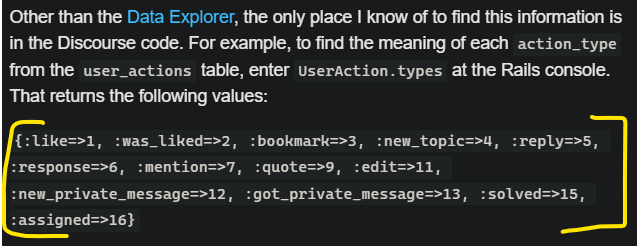
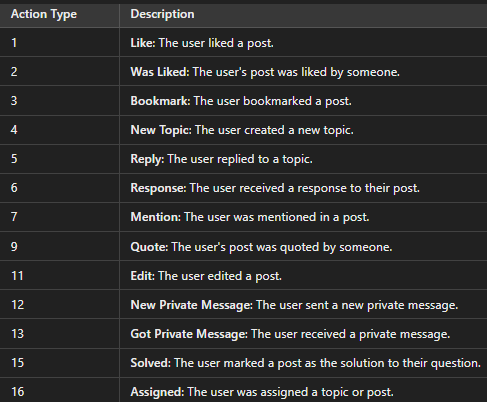

In [11]:
# Dump data_dict into a json file
with open(f'IMP_JSONs/user_actions_karthik_pod.json', "w") as f:
    f.write(json.dumps(data_dict, indent=4))

# EXPERIMENT

In [17]:
# Keep the below code in a loop and increment the offset by 30 each time. The loop should break when the number of elements in the response is less than 30
offset = 0
data_dict ={"user_actions":[]}
while True:
    time.sleep(0.1)
    endpoint = f'https://{defaultHost}/user_actions.json?username=karthik_pod&offset={offset}&filter=5'
    # Make the request
    response = requests.get(endpoint, 
                            headers=headers)

    # Check the response
    if response.status_code == 200:
        data = response.json()
        num_elements = len(data["user_actions"])
        data_dict["user_actions"].extend(data["user_actions"])
        offset+=30
        if offset%900==0:
            print(offset, len(data_dict["user_actions"]))
        if num_elements<30:
            break
    else:
        print(f'Error: {response.status_code}')
        break


900 900
1800 1800
Error: 429


In [ ]:
data_dict["user_actions"][-1]